In [131]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [130]:
df= pd.read_csv("income.csv")
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [97]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [98]:
df.describe(include = "O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [99]:
np.unique(df['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [100]:
np.unique(df['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [101]:
df = pd.read_csv('income.csv',na_values=[" ?"]) 

In [102]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [103]:
missing = df[df.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [104]:
df2 = df.dropna(axis=0)

In [105]:
df2.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [106]:
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

/Users/vaishnav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


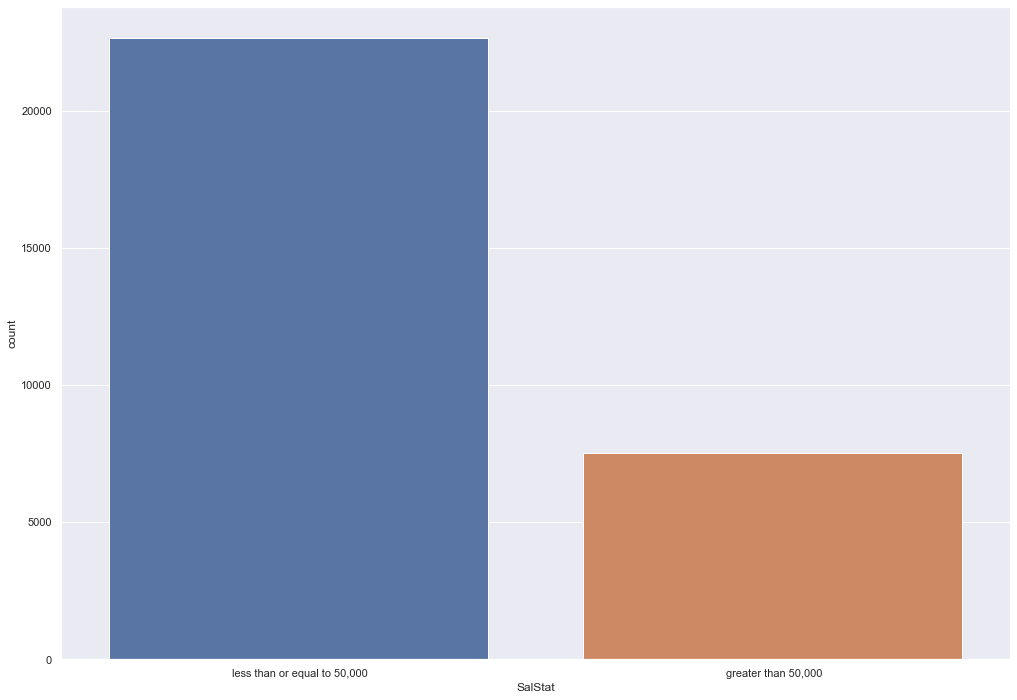

In [107]:
sns.set(rc={"figure.figsize":(17,12)})
st=sns.countplot(df2["SalStat"])

/Users/vaishnav/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

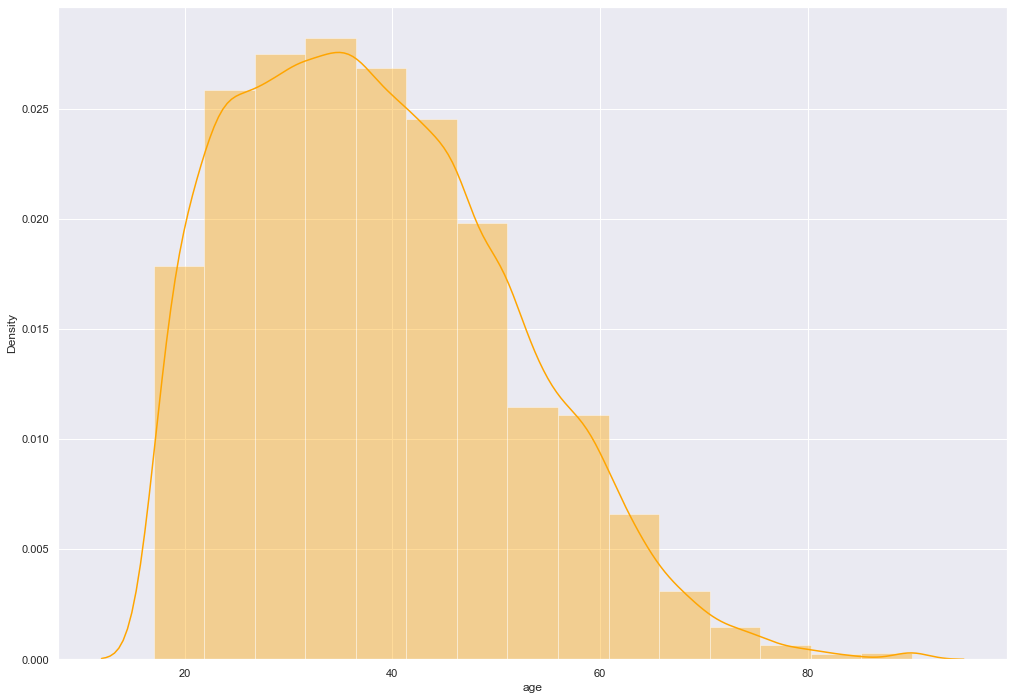

In [108]:
sns.distplot(df2["age"],bins=15,color="orange")

/Users/vaishnav/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss'>

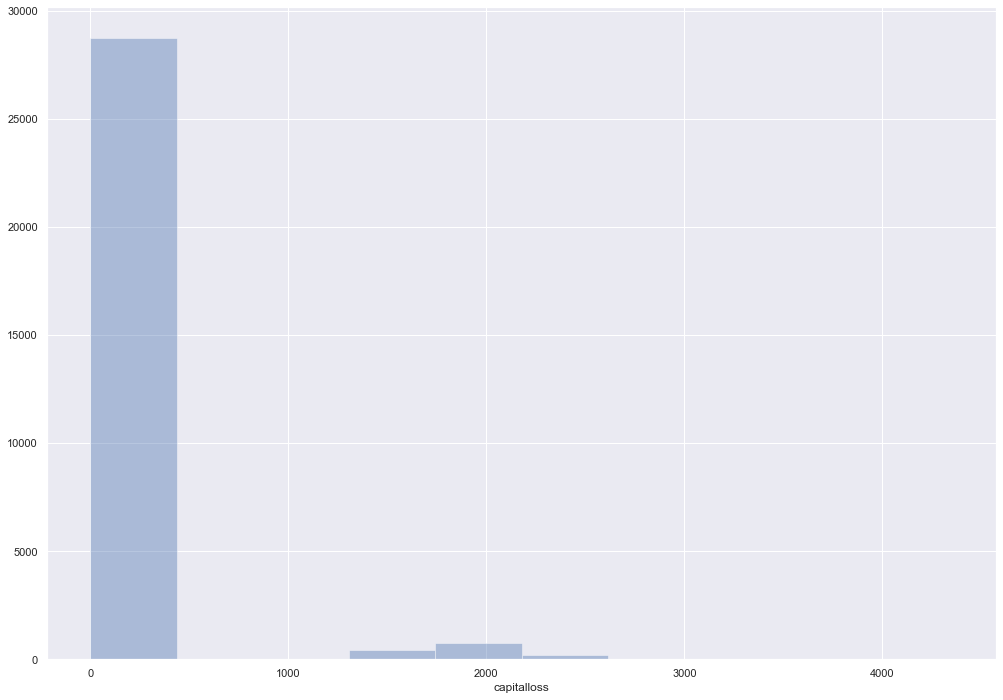

In [109]:
sns.distplot(df2['capitalloss'], bins = 10, kde = False)

<AxesSubplot:xlabel='capitalgain'>

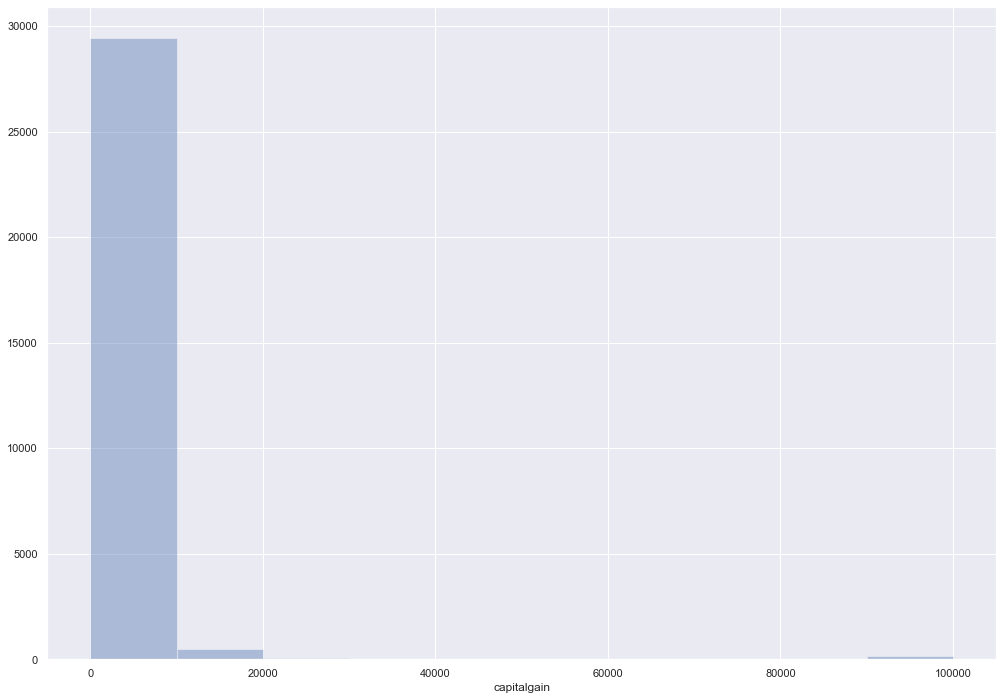

In [110]:
sns.distplot(df2['capitalgain'], bins = 10, kde = False)

<AxesSubplot:xlabel='JobType', ylabel='age'>

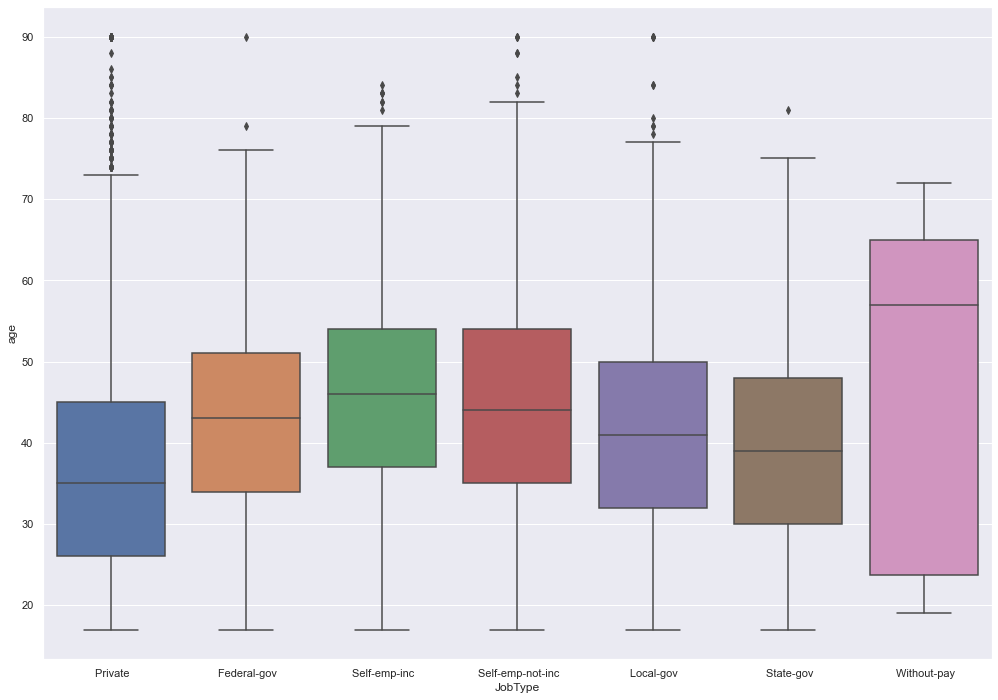

In [111]:
sns.boxplot(x=df2["JobType"],y=df2["age"])

<AxesSubplot:xlabel='EdType', ylabel='age'>

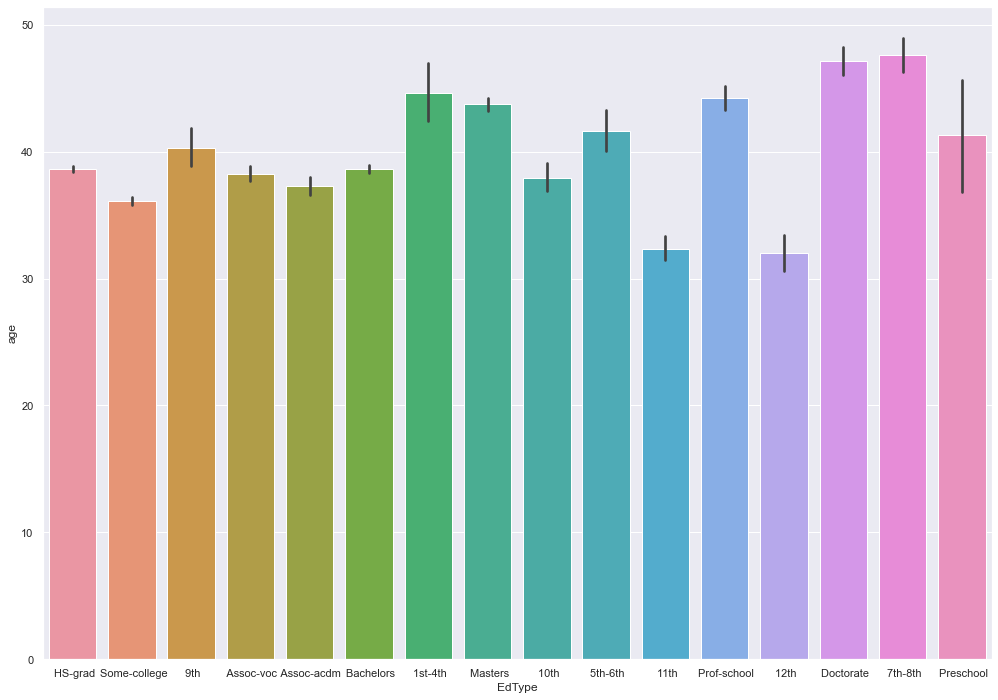

In [112]:
sns.barplot(x=df2["EdType"],y=df2["age"])

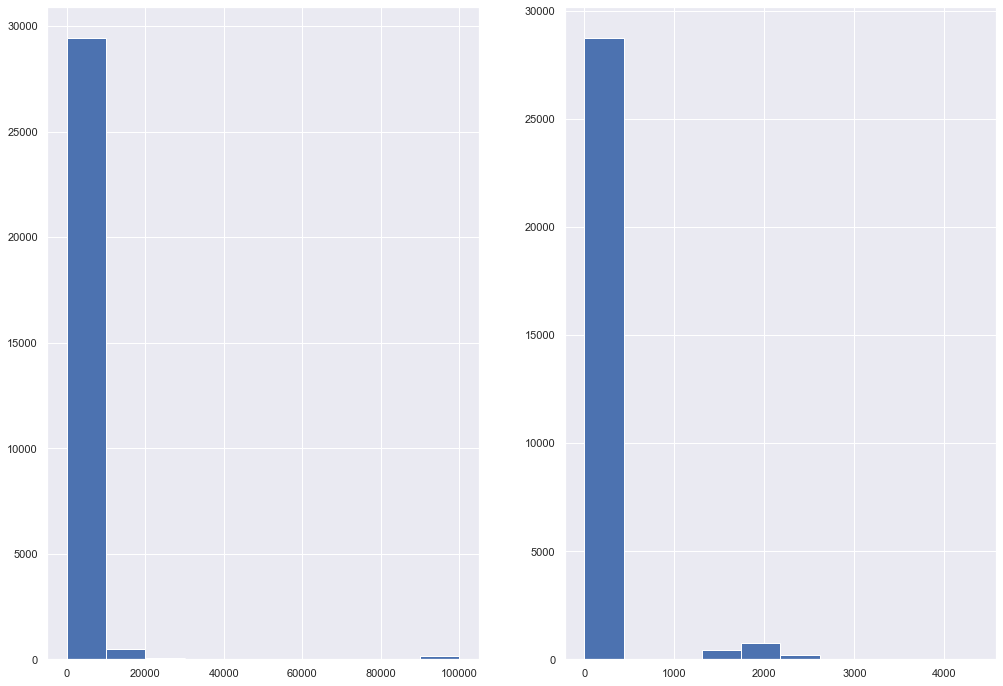

In [113]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(df2["capitalgain"])
plt.subplot(1,2,2)
plt.hist(df2["capitalloss"])
plt.show()

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

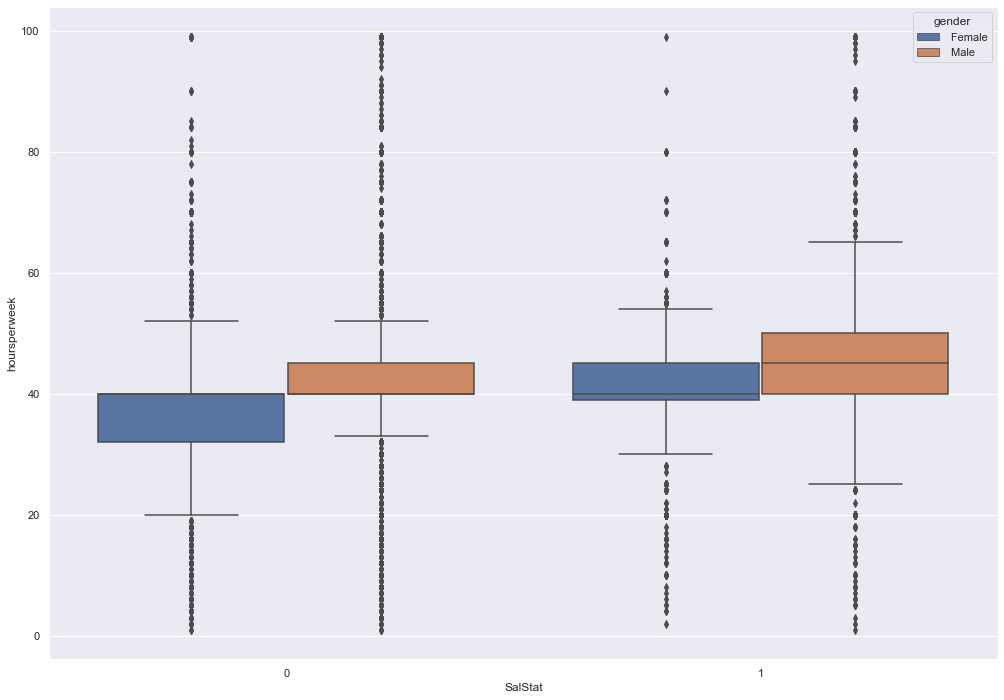

In [133]:
sns.boxplot(x=df2["SalStat"],y=df2["hoursperweek"],hue=df2["gender"])

In [115]:
df2['SalStat']=df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

<ipython-input-115-a47e7833bda8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalStat']=df2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [116]:
df2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [117]:
new_df=pd.get_dummies(df2, drop_first=True)

In [118]:
columns_list=list(new_df.columns)

In [119]:
features=list(set(columns_list)-set(['SalStat']))

In [120]:
y=new_df['SalStat'].values

In [121]:
x = new_df[features].values

In [122]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [123]:
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)

In [124]:
logistic.fit(train_x,train_y)

LogisticRegression(max_iter=10000)

In [125]:
logistic.coef_

array([[ 1.06969608e+00,  3.82136558e-01, -2.44717793e-02,
         1.37432552e-01, -5.14186513e-02, -2.16246693e-01,
        -6.08282896e-01, -3.73552216e-01,  8.57728415e-01,
        -9.88170929e-02, -1.23688539e-02, -1.54960062e-01,
        -9.96374871e-01, -7.51968867e-01, -1.92700981e-02,
         2.55804088e-02, -2.64091184e-03, -1.28929979e+00,
        -3.11676253e-02, -1.98431932e-01, -7.07296686e-01,
         1.15688516e+00, -3.90180641e-01, -2.86163658e-02,
        -2.64361539e-01,  3.72060001e-02, -1.61252576e+00,
         5.61990827e-01, -4.54305991e-01, -2.39153801e-01,
        -1.08633603e-02, -7.33974377e-02,  3.17111863e-04,
        -1.10332482e-02, -5.56582725e-01, -2.82609953e-02,
        -1.11975652e+00,  7.57470247e-01,  6.04085195e-02,
         1.71651934e-01, -1.04218721e-02, -6.77254799e-01,
         7.67589895e-01, -7.48880412e-01, -6.76490875e-01,
        -4.72179778e-02, -8.26465446e-01, -2.24844973e-01,
        -1.47982168e-01, -2.51934615e-02, -3.82167099e-0

In [126]:
logistic.intercept_

array([-3.00798911])

In [127]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [128]:
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6319  504]
 [ 915 1311]]


In [132]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8431870924964084
